**Step 1: Big Picture and Setup**

In [1]:
# general imports here
import pandas as pd
import numpy as np
import os
import urllib.request

**Step 2: Get the data**

In [2]:
# Create a directory to store data
data_path = "datasets/dropout-tables"
os.makedirs(data_path, exist_ok=True)

# File URLs
files = {
    "dropout_rates.csv": "https://raw.githubusercontent.com/Midnightx689/Dropout-Tables/main/cohort_graduation_and_dropout_rates.csv",
    "absenteeism.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/chronic-absenteeism-school-2022.xlsx",
    "behavior.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/student_behavior.xlsx",
}

# Download files
for filename, url in files.items():
    file_path = os.path.join(data_path, filename)
    urllib.request.urlretrieve(url, file_path)
    print(f"Downloaded {filename} to {file_path}")

Downloaded dropout_rates.csv to datasets/dropout-tables/dropout_rates.csv
Downloaded absenteeism.xlsx to datasets/dropout-tables/absenteeism.xlsx
Downloaded behavior.xlsx to datasets/dropout-tables/behavior.xlsx


In [3]:
def load_dropout_data(data_path=data_path):
    csv_path = os.path.join(data_path, "dropout_rates.csv")
    return pd.read_csv(csv_path)

dropout_rates = load_dropout_data()
dropout_rates.head()

,Cohort Year,Level,Division Number,Division Name,School Number,School Name,Type of Graduation Rate,Rate Type,Graduation Rate,Students in Cohort,...,Other Diplomas,Applied Studies,GED,ISAEP,Certificate of Completion,Completion Rate,Dropout Rate,Dropouts,Still Enrolled,Long-Term Absence
0,2023,School,1.0,Accomack County,540.0,Arcadia High,On-Time Graduation Rate,4 yr rate,83.71%,178,...,0,<,2,0,0,84.83%,3.93%,7,4,16
1,2023,School,1.0,Accomack County,580.0,Chincoteague High,On-Time Graduation Rate,4 yr rate,91.67%,36,...,0,0,0,0,0,91.67%,5.56%,2,0,1
2,2023,School,1.0,Accomack County,70.0,Nandua High,On-Time Graduation Rate,4 yr rate,91.72%,157,...,0,<,0,0,0,91.72%,7.01%,11,1,1
3,2023,School,1.0,Accomack County,530.0,Tangier Combined,On-Time Graduation Rate,4 yr rate,<,<,...,<,<,<,<,<,<,<,<,<,<
4,2023,School,2.0,Albemarle County,880.0,Albemarle High,On-Time Graduation Rate,4 yr rate,92.02%,476,...,0,10,1,2,0,92.65%,5.88%,28,7,0


In [4]:
dropout_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cohort Year                335 non-null    int64  
 1   Level                      335 non-null    object 
 2   Division Number            334 non-null    float64
 3   Division Name              334 non-null    object 
 4   School Number              334 non-null    float64
 5   School Name                334 non-null    object 
 6   Type of Graduation Rate    335 non-null    object 
 7   Rate Type                  335 non-null    object 
 8   Graduation Rate            335 non-null    object 
 9   Students in Cohort         335 non-null    object 
 10  Total Graduates            335 non-null    object 
 11  Advanced Studies           335 non-null    object 
 12  IB                         335 non-null    object 
 13  Standard                   335 non-null    object 

In [5]:
missing = dropout_rates.isnull().sum() # check missing values
missing = missing[missing > 0]
print(missing)

Division Number    1
Division Name      1
School Number      1
School Name        1
dtype: int64


In [6]:
dropout_rates.describe()

,Cohort Year,Division Number,School Number
count,335.0,334.000000,334.000000
mean,2023.0,68.260479,590.155689
std,0.0,41.963817,621.557638
min,2023.0,1.000000,10.000000
25%,2023.0,29.000000,142.750000
50%,2023.0,68.500000,460.000000
75%,2023.0,101.750000,827.750000
max,2023.0,207.000000,5130.000000


In [7]:
import pandas as pd
import numpy as np

dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
dropout_rates.replace({"<": np.nan, "N/A": np.nan, "nan": np.nan, "": np.nan}, inplace=True)

percent_columns = ["Graduation Rate", "Completion Rate", "Dropout Rate"]
for col in percent_columns:
    dropout_rates[col] = dropout_rates[col].astype(str).str.rstrip("%").astype(float)

numeric_columns = ["Students in Cohort", "Other Diplomas", "Applied Studies", "GED",
                   "ISAEP", "Certificate of Completion", "Dropouts", "Still Enrolled", "Long-Term Absence"]
dropout_rates[numeric_columns] = dropout_rates[numeric_columns].apply(pd.to_numeric, errors="coerce")

dropout_rates.fillna(0, inplace=True)

print(dropout_rates.head())


<ipython-input-7-c6bef1aa2be0>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


   Cohort Year   Level  Division Number     Division Name  School Number  \
0         2023  School              1.0   Accomack County          540.0   
1         2023  School              1.0   Accomack County          580.0   
2         2023  School              1.0   Accomack County           70.0   
3         2023  School              1.0   Accomack County          530.0   
4         2023  School              2.0  Albemarle County          880.0   

         School Name  Type of Graduation Rate  Rate Type  Graduation Rate  \
0       Arcadia High  On-Time Graduation Rate  4 yr rate            83.71   
1  Chincoteague High  On-Time Graduation Rate  4 yr rate            91.67   
2        Nandua High  On-Time Graduation Rate  4 yr rate            91.72   
3   Tangier Combined  On-Time Graduation Rate  4 yr rate             0.00   
4     Albemarle High  On-Time Graduation Rate  4 yr rate            92.02   

   Students in Cohort  ... Other Diplomas Applied Studies  GED ISAEP  \
0       

Model Evaluation Metrics:
Accuracy:  0.70
Precision: 0.69
Recall:    0.69
F1 Score:  0.69


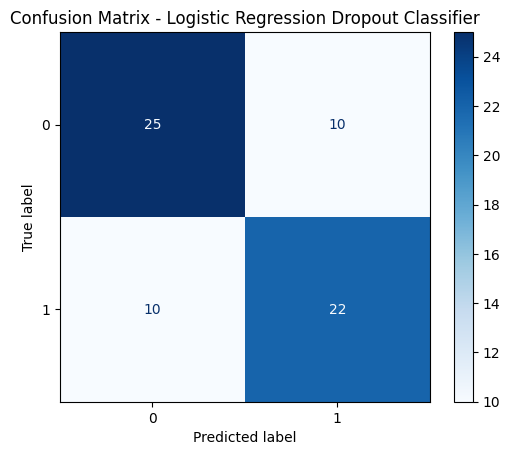

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)


categorical_features = ["Division Name", "School Name", "Type of Graduation Rate"]
numeric_features = ["Students in Cohort", "Graduation Rate", "Completion Rate", "Still Enrolled", "Long-Term Absence"]

for col in categorical_features:
    dropout_rates[col] = dropout_rates[col].astype(str)

X = dropout_rates[categorical_features + numeric_features]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dropout_threshold = 4.1
y = (dropout_rates["Dropout Rate"] > dropout_threshold).astype(int)  # 1 = high risk

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression Dropout Classifier")
plt.show()
